In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_regression, r_regression, mutual_info_regression
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures, SplineTransformer, KBinsDiscretizer, \
     StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, r2_score, get_scorer_names, accuracy_score, f1_score, precision_score, \
     confusion_matrix, balanced_accuracy_score
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, KFold, train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.svm import SVC
import lightgbm as lgb
from xgboost.sklearn import XGBClassifier

import warnings 
warnings.filterwarnings("ignore")

# Challenge 2 Submission Instructions

Load the training data within the /data/ folder and code scripts in Python or R that develops predictive models that predict the response of 4 drugs or 2 drug combinations that are included in the training data. Your model must be interpretable in the sense where you are at least able to identify the important features underlying predictions made. After developing models for each drug or combination, predictions must be made on provided Test Set Data (to be released), as well as identification of the key features of these predictions.

## Scoring

Submissions will be scored automatically based on accuracy of model predictions with a set of test data. Additionally, short answer questions will be evaluated by judges at Lantern for 20% weight (only top performing scores will be evaluated). It is required to submit specific files described below into a Results folder and for scripts used for model generation to be in participant's Code Ocean capsule. 

## Submission files

Two separate tables will be submitted to both describe each model used and give their prediction results on the test set. For the submission, only a single chosen model should be described for each of the 6 drug or drug/combinations to be modeled. If more than one model is available for different drug or drug/combination predictions, choose the model believed to be the best. Details of expected output for table submissions are described below.


### File Overview
Required submission files are provided with blank answers which are to be modified with the participant's ID (team name or individual name) and copied into the Results folder. If you have a team ID of "xyz" and the base file of "short_answers.txt", the final file copied into results after answers are included should be "xyz_short_answers.txt".  
Tables provided in a .tsv file have NA values which will be replaced with answers based on the drug combination challenge results. Short answer questions are provided in a text file, which should be edited so that submission answers are typed directly below.

1. Model Information Table  
The **"model_info.tsv"** (base file name) file will contain a basic description of the final model developed for the 6 different drug/drug-combination types. See Table 1 Fields section below for instructions on answer input.  

2. Model Prediction and Analyis Table  
The **"model_output.tsv"** (base file name) file will contain predictions made on test data as 1 for a responsive sample prediction and 0 for a prediction of an absence of drug efficacy (as in the training data), as well as a string input to indicate the most important feature involved in that prediction.  

3. Short Answer Text File  
The **"short_answers.txt"** (base file name) file contains a few answers that can be edited directly below the question, and must be within the specified word limit.  

To submit files, copy each of the modified files with the appropriate file name indicating participant ID into the Results folder and share results as a data asset.  


#### Table 1 fields
*Filename*: Respective models should be saved in the Code folder. Put the filename of the model file, including the extension (e.g., .rds).  

*Algorithm used*: Write a description of the algorithm used for the specific model. It can be a custom algorithm, or an algorithm from public packages. For algorithms from a public package that have more than one algorithm available, input them with the following format: package_algorithm (e.g., caret_rf, or sklearn_svm).  

*Training accuracy*: Overall accuracy of models on the entire training set as a fraction (e.g.: 0.55).  

*Number of Features*: Number of features used by model to make predicitons as an integer.  

*Feature evaluation method*: Describe the method used to determine the key feature for your models. This could be a popular method such as using public packages to calculate Shapley values, a custom approach, or any method of choice--there are no limitations on method used.  

*Overall key feature*: Input the feature most important for predictions for the entire training set when using the method described in "Feature evaluation method". Either provided features (e.g., mut_gene1 or rna_gene2) or custom/engineered features are allowed.  

*Cancer-type specific key feature*: The same as above, but determined with distinct cancer type categories. There will be separate rows for "BrainCNS key feature", "Prostate key feature", etc.  


#### Table 2 fields
Each entry into Table 2 will be either a prediction of response (as 1 or 0, as in the training data), and a string that indicates the most important feature. For example, there will be a "Fulvestrant_response" column, and a "Fulvestrant_key_feature" column. The response will be 1 or 0 for test set samples, and the key feature is the most important feature. The feature should be derived using the same methodology as in identification of key features in Table 1 - but corresponding to only a single sample. In general terms, the "key feature" should indicate what feature was most important for the prediction in that sample.  

### Short answers
In the Challenge 2 data asset, type in responses to the questions in "short_answers.txt" within the word limit and save them to the Submission folder.

## Submission 
Launch a Reproducible run which will execute the code needed to fill in the results for the tables and manually edit text files for short answers. When creating a Data Asset after a reproducible run to share your submission, use the format of Challenge2_participantID and the folder should be /data/Challenge2. After the data asset is created, make sure it is shared with participant judges from Lantern. The final name of the files should follow the format describe above. See the base Challenge 2 capsule Run file for an example of how to use a script to copy results create_sample_submission.py, which can be edited as needed. 


In [4]:
# df1 = pd.read_csv('rapamycinTrain.tsv', sep='\t', low_memory=True)
# df2 = pd.read_csv('fulvestrantTrain.tsv', sep='\t', low_memory=True)
# df3 = pd.read_csv('gefitinibTrain.tsv', sep='\t', low_memory=True)
# df4 = pd.read_csv('mitomycinTrain.tsv', sep='\t', low_memory=True)
# df5 = pd.read_csv('rapamycinGefitinibTrain.tsv', sep='\t', low_memory=True)
# df6 = pd.read_csv('mitomycinFulvestrantTrain.tsv', sep='\t', low_memory=True)
df = pd.read_csv('allTrain.tsv', sep='\t', low_memory=True)

In [5]:
df

,Rapamycin_response,type,mut_C1orf222,mut_CAMTA1,mut_H6PD,mut_SPEN,mut_HSPG2,mut_ARID1A,mut_ZSCAN20,mut_CSMD2,...,rna_LOC100233156,rna_LOC389834,rna_LOC283788,rna_RNA5-8S5,rna_LOC102723780,Fulvestrant_response,Gefitinib_response,Mitomycin_response,Rapamycin-Gefitinib_response,Mitomycin-Fulvestrant_response
0,1,Breast,0,0,0,0,0,0,1,0,...,0.000000,0.377070,0.743830,7.430427,0.379076,1,0,0,1,0
1,1,Breast,0,0,0,0,0,0,0,0,...,0.763473,0.508316,1.166169,9.509599,1.445901,0,0,0,0,1
2,1,Breast,0,0,0,0,1,0,1,0,...,1.167377,1.316250,1.320358,7.672418,0.230426,1,0,1,0,1
3,0,Breast,0,0,0,0,0,0,0,0,...,0.323250,0.515944,0.272920,4.727648,0.222489,0,0,0,0,1
4,1,Breast,0,0,0,1,0,1,0,0,...,1.402040,1.296005,1.550906,10.491553,2.474496,1,0,0,1,0
5,1,BrainCNS,0,0,0,0,0,0,0,0,...,1.905027,1.128848,1.374177,8.496694,0.944022,0,1,1,0,1
6,1,BrainCNS,1,0,1,0,1,0,0,0,...,0.451879,0.330438,1.764053,11.751653,0.971064,0,0,1,0,0
7,0,BrainCNS,0,0,0,0,0,0,0,0,...,2.043967,0.580410,1.375495,6.484670,0.338628,0,0,1,1,1
8,1,BrainCNS,0,0,0,0,0,0,0,0,...,1.606092,0.960532,1.533429,9.712594,0.616633,0,0,1,1,1
9,0,BrainCNS,0,0,0,0,0,0,0,0,...,2.246290,1.788611,1.561517,11.177532,2.204347,0,0,1,0,0


In [6]:
# df = df1.copy()
# df['Fulvestrant_response'] = df2.Fulvestrant_response
# df['Gefitinib_response'] = df3.Gefitinib_response
# df['Mitomycin_response'] = df4.Mitomycin_response
# df['Rapamycin-Gefitinib_response'] = df5['Rapamycin-Gefitinib_response']
# df['Mitomycin-Fulvestrant_response'] = df6['Mitomycin-Fulvestrant_response']


In [7]:
df.describe()

,Rapamycin_response,mut_C1orf222,mut_CAMTA1,mut_H6PD,mut_SPEN,mut_HSPG2,mut_ARID1A,mut_ZSCAN20,mut_CSMD2,mut_MACF1,...,rna_LOC100233156,rna_LOC389834,rna_LOC283788,rna_RNA5-8S5,rna_LOC102723780,Fulvestrant_response,Gefitinib_response,Mitomycin_response,Rapamycin-Gefitinib_response,Mitomycin-Fulvestrant_response
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.520833,0.166667,0.104167,0.104167,0.166667,0.145833,0.166667,0.125000,0.166667,0.083333,...,0.987229,0.622126,1.054658,10.509791,0.914311,0.166667,0.333333,0.437500,0.458333,0.562500
std,0.504852,0.376622,0.308709,0.308709,0.376622,0.356674,0.376622,0.334219,0.376622,0.279310,...,0.702078,0.430358,0.463828,2.273620,0.674039,0.376622,0.476393,0.501328,0.503534,0.501328
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.166925,3.829951,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.443859,0.289601,0.702650,9.159831,0.437657,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.923775,0.543560,1.038418,11.387891,0.890495,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.414979,0.839956,1.376191,12.097373,1.168868,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.339186,1.788611,2.375384,13.777173,2.762691,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.describe(include=[np.int64])

,Rapamycin_response,mut_C1orf222,mut_CAMTA1,mut_H6PD,mut_SPEN,mut_HSPG2,mut_ARID1A,mut_ZSCAN20,mut_CSMD2,mut_MACF1,...,rna_MIR6807,rna_SNORA71D,rna_P2RX6P,rna_SNORD83B,rna_SNORA11E,Fulvestrant_response,Gefitinib_response,Mitomycin_response,Rapamycin-Gefitinib_response,Mitomycin-Fulvestrant_response
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.0,48.0,48.0,48.0,48.0,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.520833,0.166667,0.104167,0.104167,0.166667,0.145833,0.166667,0.125000,0.166667,0.083333,...,0.0,0.0,0.0,0.0,0.0,0.166667,0.333333,0.437500,0.458333,0.562500
std,0.504852,0.376622,0.308709,0.308709,0.376622,0.356674,0.376622,0.334219,0.376622,0.279310,...,0.0,0.0,0.0,0.0,0.0,0.376622,0.476393,0.501328,0.503534,0.501328
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
constant_columns

['rna_MIR6728',
 'rna_MIR6084',
 'rna_RNVU1-20',
 'rna_MIR568',
 'rna_MIR7110',
 'rna_HTN3',
 'rna_GYPB',
 'rna_SNORA29',
 'rna_MIR7-1',
 'rna_MIR455',
 'rna_SNORA70C',
 'rna_MIR5699',
 'rna_SNORA19',
 'rna_HBBP1',
 'rna_MIR7851',
 'rna_SNORA34',
 'rna_SNORA2B',
 'rna_AHSP',
 'rna_MIR212',
 'rna_MIR636',
 'rna_MIR5196',
 'rna_MIR330',
 'rna_MIR6807',
 'rna_SNORA71D',
 'rna_P2RX6P',
 'rna_SNORD83B',
 'rna_SNORA11E']

<Axes: ylabel='Frequency'>

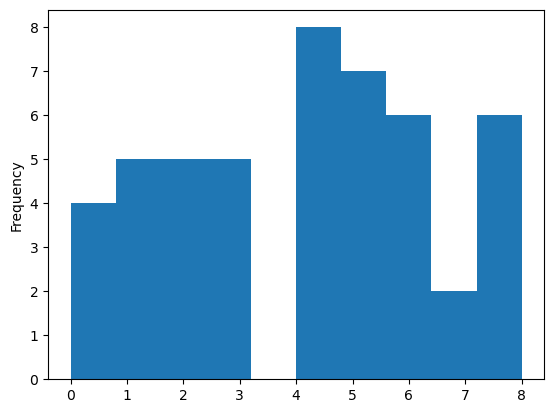

In [10]:
enc = OrdinalEncoder()
df.type = enc.fit_transform(df.type.values.reshape(-1,1))
df.type.plot(kind='hist')

In [11]:
test_idx = [2, 4, 5, 13, 15, 19, 24, 30, 34, 36, 38, 40, 44, 46]
labels = df[['Rapamycin_response', 'Mitomycin_response', 'Fulvestrant_response', 'Gefitinib_response', 'Rapamycin-Gefitinib_response', 'Mitomycin-Fulvestrant_response']]

In [12]:
features = df.drop(columns=labels.columns.to_list()+constant_columns, axis=1)
label = labels.Rapamycin_response
X_train, X_test, y_train, y_test = features.drop(test_idx, axis=0).reset_index(drop=True), features.iloc[features.index[test_idx]], labels.drop(test_idx, axis=0).reset_index(drop=True), labels.iloc[labels.index[test_idx]]

In [13]:
mut_features = features.select_dtypes(include=['int'])
rna_features = features.select_dtypes(include=['float'])

In [14]:
numeric_transformer = Pipeline([
      # ('bin', KBinsDiscretizer(encode='ordinal', strategy='kmeans')),
      ('scale', StandardScaler()),
      ('pca', PCA(0.9995)),
      # ('select_feats', SelectFromModel(LogisticRegression(solver='liblinear', penalty='l1'))),
      # ('poly_feats', PolynomialFeatures(degree=2, interaction_only=True))
])
categorical_transformer = Pipeline([
      ('encoder', OrdinalEncoder()),
])

In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, rna_features.columns),
        # ('cat', categorical_transformer, ['type'])
    ],
    remainder='passthrough'
)

In [16]:
lr_params={
    'fit_intercept':True,
    'C':1.0,
    'solver':'lbfgs',
    'penalty': 'l2',
    'random_state':42,
}

In [18]:
pipe = Pipeline([
    ('prep', preprocessor),
    ('select_feats', SelectFromModel(LogisticRegression(solver='liblinear', penalty='l1', random_state=2, max_iter=420))),
    ('model', XGBClassifier())
])
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'prep', 'select_feats', 'model', 'prep__n_jobs', 'prep__remainder', 'prep__sparse_threshold', 'prep__transformer_weights', 'prep__transformers', 'prep__verbose', 'prep__verbose_feature_names_out', 'prep__num', 'prep__num__memory', 'prep__num__steps', 'prep__num__verbose', 'prep__num__scale', 'prep__num__pca', 'prep__num__scale__copy', 'prep__num__scale__with_mean', 'prep__num__scale__with_std', 'prep__num__pca__copy', 'prep__num__pca__iterated_power', 'prep__num__pca__n_components', 'prep__num__pca__n_oversamples', 'prep__num__pca__power_iteration_normalizer', 'prep__num__pca__random_state', 'prep__num__pca__svd_solver', 'prep__num__pca__tol', 'prep__num__pca__whiten', 'select_feats__estimator__C', 'select_feats__estimator__class_weight', 'select_feats__estimator__dual', 'select_feats__estimator__fit_intercept', 'select_feats__estimator__intercept_scaling', 'select_feats__estimator__l1_ratio', 'select_feats__estimator__max_iter', 'select_feats__

In [19]:
scores = cross_validate(pipe, X_train, y_train.Rapamycin_response, cv=5, scoring=['accuracy', 'f1'], n_jobs=-1)
print(f"------{ pipe['model'].__class__.__name__ }-----")
print(f'accuracy cv: ' + str(np.nanmean(scores['test_accuracy'])))
print(f'accuracy cv std: ' + str(np.nanstd(scores['test_accuracy'])))
print(f'F1 cv: ' + str(np.nanmean(scores['test_f1'])))
print(f'F1 cv std: ' + str(np.nanstd(scores['test_f1'])))

------XGBClassifier-----
accuracy cv: 0.619047619047619
accuracy cv std: 0.1412609235637269
F1 cv: 0.6547619047619048
F1 cv std: 0.17528726018386628


In [20]:
import itertools
 
def union_lists(*lists):
    concatenated_list = list(itertools.chain(*lists))
    unique_set = set(concatenated_list)     
    final_union = list(unique_set)
    return final_union

def select_features(est,features, label):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=120)
    imp_feats_2 = []
    bas = []
    f1 = []
    for train_idx, val_idx in cv.split(features, label):
        imp_feats_ = pd.DataFrame()
        X, y = features.iloc[train_idx], label[train_idx]
        Xval, yval = features.iloc[val_idx], label[val_idx]
        est.fit(X,y)
        pred = est.predict(Xval)
        bas.append(balanced_accuracy_score(yval, pred))
        f1.append(f1_score(yval, pred, average='weighted'))
        try:
            feat_imp = est.coef_.reshape(-1)
        except:
            feat_imp = est.feature_importances_
        try:
            feat_names = est.feature_names_in_
        except:
            feat_names = est.feature_name_
        feats_ = {feat_names[i]:imp for i, imp in enumerate(feat_imp) if imp != 0}
        imp_feats_['feats'] = list(feats_.keys())
        imp_feats_['imps'] = list(feats_.values())
        imp_feats_.sort_values('imps', inplace=True, ignore_index=True, ascending=False)
        imp_feats_2.append(imp_feats_)

    # feats_list = [list(feats.keys()) for feats in feats_cv]
    topf = pd.concat(imp_feats_2, axis=0, ignore_index=True)
    topf = topf.groupby('feats')['imps'].apply(sum).sort_values(ascending=False).index.to_list()
    print(f'Balanced Accuracy cv: ' + str(np.nanmean(bas)))
    print(f'accuracy cv std: ' + str(np.nanstd(bas)))
    print(f'F1 cv: ' + str(np.nanmean(f1)))
    print(f'F1 cv std: ' + str(np.nanstd(f1)))
    return topf, topf[0]

def run_test(pipe, imp_feats, label):
    pipe.fit(X_train[imp_feats], y_train[label])
    pred = pipe.predict(X_test[imp_feats])
    bas = balanced_accuracy_score(y_test[label], pred)
    f1 = f1_score(y_test[label], pred, average='weighted')
    # print(f"--------------{model.__class__.__name__}-------------")
    print(f"------{ pipe['model'].__class__.__name__ }-----")
    print(f'Balanced Accuracy test: {bas}')
    print(f'F1 test: {f1}')

def run_cv(pipe, label, splits):
    cv_ = StratifiedKFold(n_splits=splits, shuffle=True, random_state=2)
    scores = cross_validate(pipe, X_train, y_train[label], cv=cv_, scoring=['balanced_accuracy', 'f1_weighted'], n_jobs=-1)
    print(f"------{ pipe['model'].__class__.__name__ }-----")
    print(f'accuracy cv: ' + str(np.nanmean(scores['test_balanced_accuracy'])))
    print(f'accuracy cv std: ' + str(np.nanstd(scores['test_balanced_accuracy'])))
    print(f'F1 cv: ' + str(np.nanmean(scores['test_f1_weighted'])))
    print(f'F1 cv std: ' + str(np.nanstd(scores['test_f1_weighted'])))

In [21]:
lr = LogisticRegression(**lr_params, class_weight='balanced', max_iter=1000)
svm = SVC(class_weight='balanced', probability=True)
dtc = DecisionTreeClassifier(class_weight='balanced', random_state=420)
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
lgbm = lgb.LGBMClassifier(class_weight='balanced')
xgb = XGBClassifier()
vcs = VotingClassifier(estimators=[('svc', svm), ('rf', rf), ('xgb', xgb), ('dtc', dtc)], voting='hard')
vch = VotingClassifier(estimators=[('svc', svm), ('rf', rf), ('xgb', xgb), ('dtc', dtc)], voting='soft')
sc = StackingClassifier(estimators=[('vch', vch), ('xgb', xgb), ('rf', rf), ('vcs', vcs)], stack_method='predict', final_estimator=DecisionTreeClassifier(class_weight='balanced', random_state=420))
scp = StackingClassifier(estimators=[('vch', vch), ('xgb', xgb), ('rf', rf), ('svc', svm), ('lr', lr)], stack_method='predict_proba', final_estimator=DecisionTreeClassifier(class_weight='balanced', random_state=420))
scd = StackingClassifier(estimators=[('svc', svm), ('lr', lr)], stack_method='decision_function', final_estimator=DecisionTreeClassifier(class_weight='balanced', random_state=42))
models = [lr, dtc, svm, rf, lgbm, xgb, vcs, vch, sc, scp, scd]
models_fs = [LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', random_state=2, max_iter=420), rf, xgb, DecisionTreeClassifier(class_weight='balanced', random_state=420)]

In [72]:
imp_feats_lr, topf_lr = select_features(LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear', random_state=42), X_train, y_train.Rapamycin_response)

Balanced Accuracy cv: 0.5666666666666667
accuracy cv std: 0.12247448713915889
F1 cv: 0.5471428571428572
F1 cv std: 0.15515627408440533


In [73]:
len(imp_feats_lr), topf_lr

(62, 'rna_MAL')

In [74]:
imp_feats_rf, topf_rf = select_features(rf, X_train, y_train.Rapamycin_response)

Balanced Accuracy cv: 0.575
accuracy cv std: 0.08897565210026093
F1 cv: 0.569047619047619
F1 cv std: 0.07149203529842403


In [75]:
len(imp_feats_rf), topf_rf

(1052, 'rna_RPL13A')

In [58]:
imp_feats_xgb, topf_xgb = select_features(xgb, X_train, y_train.Rapamycin_response)

Balanced Accuracy cv: 0.6249999999999999
accuracy cv std: 0.24008100484813222
F1 cv: 0.62
F1 cv std: 0.2467089502276903


In [59]:
len(imp_feats_xgb), topf_xgb

(63, 'rna_ADI1')

In [97]:
for fsm in models_fs:
    print(f"----------------------{fsm.__class__.__name__}--------------------")
    for model in models:
        pipe = Pipeline([
            ('prep', preprocessor),
            ('select_feats', SelectFromModel(fsm, max_features=100)),
            ('model', model)
        ])
        run_test(pipe, X_train.columns.to_list(), 'Rapamycin_response')


----------------------LogisticRegression--------------------
------LogisticRegression-----
Balanced Accuracy test: 0.4375
F1 test: 0.42857142857142855
------DecisionTreeClassifier-----
Balanced Accuracy test: 0.5625
F1 test: 0.5714285714285714
------SVC-----
Balanced Accuracy test: 0.375
F1 test: 0.3472527472527473
------RandomForestClassifier-----
Balanced Accuracy test: 0.375
F1 test: 0.3472527472527473
------LGBMClassifier-----
Balanced Accuracy test: 0.5
F1 test: 0.4155844155844156
------XGBClassifier-----
Balanced Accuracy test: 0.5625
F1 test: 0.5714285714285714
------VotingClassifier-----
Balanced Accuracy test: 0.47916666666666663
F1 test: 0.4919786096256685
------VotingClassifier-----
Balanced Accuracy test: 0.5625
F1 test: 0.5714285714285714
------StackingClassifier-----
Balanced Accuracy test: 0.4583333333333333
F1 test: 0.4047619047619047
------StackingClassifier-----
Balanced Accuracy test: 0.35416666666666663
F1 test: 0.36043956043956044
------StackingClassifier-----
Bala

In [102]:
for fsm in models_fs:
    print(f"----------------------{fsm.__class__.__name__}--------------------")
    for model in models:
        pipe = Pipeline([
            ('prep', preprocessor),
            ('select_feats', SelectFromModel(fsm, max_features=100)),
            ('model', model)
        ])
        run_cv(pipe, 'Rapamycin_response')

----------------------LogisticRegression--------------------
------LogisticRegression-----
accuracy cv: 0.6583333333333332
accuracy cv std: 0.1632993161855452
F1 cv: 0.7480519480519481
F1 cv std: 0.10569864908766646
------DecisionTreeClassifier-----
accuracy cv: 0.5999999999999999
accuracy cv std: 0.15723301886761007
F1 cv: 0.588095238095238
F1 cv std: 0.2166012460103649
------SVC-----
accuracy cv: 0.6916666666666667
accuracy cv std: 0.14337208778404378
F1 cv: 0.7625974025974027
F1 cv std: 0.10683631867499438
------RandomForestClassifier-----
accuracy cv: 0.6666666666666666
accuracy cv std: 0.15590239111558088
F1 cv: 0.7359307359307359
F1 cv std: 0.11074131224463708
------LGBMClassifier-----
accuracy cv: 0.5
accuracy cv std: 0.0
F1 cv: 0.13333333333333333
F1 cv std: 0.26666666666666666
------XGBClassifier-----
accuracy cv: 0.6166666666666666
accuracy cv std: 0.1452966314513558
F1 cv: 0.6547619047619048
F1 cv std: 0.17528726018386628
------VotingClassifier-----
accuracy cv: 0.65
accurac

# Fulvestrant

In [121]:
for fsm in models_fs:
    print(f"----------------------{fsm.__class__.__name__}--------------------")
    for model in models:
        pipe = Pipeline([
            ('prep', preprocessor),
            ('select_feats', SelectFromModel(fsm, max_features=100)),
            ('model', model)
        ])
        run_cv(pipe, 'Fulvestrant_response', splits=4)

----------------------LogisticRegression--------------------
------LogisticRegression-----
accuracy cv: 0.46651785714285715
accuracy cv std: 0.03363062315473073
F1 cv: 0.7952614379084968
F1 cv std: 0.03362084451450741
------DecisionTreeClassifier-----
accuracy cv: 0.36607142857142855
accuracy cv std: 0.13452249261892288
F1 cv: 0.6693873120343709
F1 cv std: 0.15932380886424655
------SVC-----
accuracy cv: 0.484375
accuracy cv std: 0.027063293868263706
F1 cv: 0.8119281045751634
F1 cv std: 0.021330258372840336
------RandomForestClassifier-----
accuracy cv: 0.5
accuracy cv std: 0.0
F1 cv: 0.8266339869281045
F1 cv std: 0.009967320261437929
------LGBMClassifier-----
accuracy cv: 0.5
accuracy cv std: 0.0
F1 cv: 0.4321895424836601
F1 cv std: 0.40441176470588236
------XGBClassifier-----
accuracy cv: 0.5
accuracy cv std: 0.0
F1 cv: 0.8266339869281045
F1 cv std: 0.009967320261437929
------VotingClassifier-----
accuracy cv: 0.5
accuracy cv std: 0.0
F1 cv: 0.8266339869281045
F1 cv std: 0.00996732026

/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_s

------StackingClassifier-----
accuracy cv: 0.5
accuracy cv std: 0.0
F1 cv: 0.22859477124183009
F1 cv std: 0.3510400641208457


/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_s

------StackingClassifier-----
accuracy cv: 0.5915178571428572
accuracy cv std: 0.19626362798776134
F1 cv: 0.830517848164907
F1 cv std: 0.04083984489416692


/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_s

------StackingClassifier-----
accuracy cv: 0.703125
accuracy cv std: 0.27018150727797785
F1 cv: 0.8578703703703703
F1 cv std: 0.10669764692851623
----------------------RandomForestClassifier--------------------
------LogisticRegression-----
accuracy cv: 0.45089285714285715
accuracy cv std: 0.05263315233281963
F1 cv: 0.77859477124183
F1 cv std: 0.050462691071978955
------DecisionTreeClassifier-----
accuracy cv: 0.36607142857142855
accuracy cv std: 0.13452249261892288
F1 cv: 0.6693873120343709
F1 cv std: 0.15932380886424655
------SVC-----
accuracy cv: 0.5
accuracy cv std: 0.0
F1 cv: 0.8266339869281045
F1 cv std: 0.009967320261437929
------RandomForestClassifier-----
accuracy cv: 0.5
accuracy cv std: 0.0
F1 cv: 0.8266339869281045
F1 cv std: 0.009967320261437929
------LGBMClassifier-----
accuracy cv: 0.5
accuracy cv std: 0.0
F1 cv: 0.4321895424836601
F1 cv std: 0.40441176470588236
------XGBClassifier-----
accuracy cv: 0.5
accuracy cv std: 0.0
F1 cv: 0.8266339869281045
F1 cv std: 0.00996732

/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_s

------StackingClassifier-----
accuracy cv: 0.5
accuracy cv std: 0.0
F1 cv: 0.22859477124183009
F1 cv std: 0.3510400641208457


/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_s

------StackingClassifier-----
accuracy cv: 0.5758928571428572
accuracy cv std: 0.20991639188408479
F1 cv: 0.8138511814982402
F1 cv std: 0.06526276588186092


/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_s

------StackingClassifier-----
accuracy cv: 0.609375
accuracy cv std: 0.18944305707784595
F1 cv: 0.8434095860566448
F1 cv std: 0.03574947817439909
----------------------XGBClassifier--------------------
------LogisticRegression-----
accuracy cv: 0.48214285714285715
accuracy cv std: 0.030929478706587105
F1 cv: 0.8099673202614379
F1 cv std: 0.03556578152159744
------DecisionTreeClassifier-----
accuracy cv: 0.5424107142857143
accuracy cv std: 0.1664855388017291
F1 cv: 0.7636375062845652
F1 cv std: 0.06631832465579225
------SVC-----
accuracy cv: 0.5714285714285714
accuracy cv std: 0.2525381361380527
F1 cv: 0.8149195575666164
F1 cv std: 0.12151003081193569
------RandomForestClassifier-----
accuracy cv: 0.5
accuracy cv std: 0.0
F1 cv: 0.8266339869281045
F1 cv std: 0.009967320261437929
------LGBMClassifier-----
accuracy cv: 0.5
accuracy cv std: 0.0
F1 cv: 0.4321895424836601
F1 cv std: 0.40441176470588236
------XGBClassifier-----
accuracy cv: 0.5
accuracy cv std: 0.0
F1 cv: 0.8266339869281045
F

/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_s

------StackingClassifier-----
accuracy cv: 0.5
accuracy cv std: 0.0
F1 cv: 0.6294117647058823
F1 cv std: 0.34744886874349096


/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_s

------StackingClassifier-----
accuracy cv: 0.5
accuracy cv std: 0.0
F1 cv: 0.8266339869281045
F1 cv std: 0.009967320261437929


/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_s

------StackingClassifier-----
accuracy cv: 0.609375
accuracy cv std: 0.18944305707784595
F1 cv: 0.8434095860566448
F1 cv std: 0.03574947817439909
----------------------DecisionTreeClassifier--------------------
------LogisticRegression-----
accuracy cv: 0.3482142857142857
accuracy cv std: 0.09574826156038936
F1 cv: 0.6600050276520865
F1 cv std: 0.11180772976856662
------DecisionTreeClassifier-----
accuracy cv: 0.3683035714285714
accuracy cv std: 0.13619730187586432
F1 cv: 0.6702614379084966
F1 cv std: 0.16405277582407884
------SVC-----
accuracy cv: 0.43749999999999994
accuracy cv std: 0.22920531523202564
F1 cv: 0.6368115544586133
F1 cv std: 0.137739402173391
------RandomForestClassifier-----
accuracy cv: 0.3995535714285714
accuracy cv std: 0.10089186946419218
F1 cv: 0.7178804855275442
F1 cv std: 0.11049730319836361
------LGBMClassifier-----
accuracy cv: 0.5
accuracy cv std: 0.0
F1 cv: 0.4321895424836601
F1 cv std: 0.40441176470588236
------XGBClassifier-----
accuracy cv: 0.482142857142

/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_s

------StackingClassifier-----
accuracy cv: 0.47098214285714285
accuracy cv std: 0.09603403912633461
F1 cv: 0.23373015873015873
F1 cv std: 0.24918391618776622


/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_s

------StackingClassifier-----
accuracy cv: 0.578125
accuracy cv std: 0.17328963291264715
F1 cv: 0.8071428571428572
F1 cv std: 0.016957032237477365
------StackingClassifier-----
accuracy cv: 0.5580357142857143
accuracy cv std: 0.19206807825266922
F1 cv: 0.7859513035983624
F1 cv std: 0.06565496958505099


/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_s

In [118]:
for fsm in models_fs:
    print(f"----------------------{fsm.__class__.__name__}--------------------")
    for model in models:
        pipe = Pipeline([
            ('prep', preprocessor),
            ('select_feats', SelectFromModel(fsm, max_features=100)),
            ('model', model)
        ])
        run_test(pipe, X_train.columns.to_list(), 'Fulvestrant_response')

----------------------LogisticRegression--------------------
------LogisticRegression-----
Balanced Accuracy test: 0.5
F1 test: 0.5952380952380951
------DecisionTreeClassifier-----
Balanced Accuracy test: 0.4
F1 test: 0.5194805194805194
------SVC-----
Balanced Accuracy test: 0.5
F1 test: 0.5952380952380951
------RandomForestClassifier-----
Balanced Accuracy test: 0.5
F1 test: 0.5952380952380951
------LGBMClassifier-----
Balanced Accuracy test: 0.5
F1 test: 0.126984126984127
------XGBClassifier-----
Balanced Accuracy test: 0.5
F1 test: 0.5952380952380951
------VotingClassifier-----
Balanced Accuracy test: 0.5
F1 test: 0.5952380952380951
------VotingClassifier-----
Balanced Accuracy test: 0.5
F1 test: 0.5952380952380951


/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


------StackingClassifier-----
Balanced Accuracy test: 0.5
F1 test: 0.126984126984127


/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_s

------StackingClassifier-----
Balanced Accuracy test: 0.475
F1 test: 0.5714285714285714
------StackingClassifier-----
Balanced Accuracy test: 0.625
F1 test: 0.7354037267080746
----------------------RandomForestClassifier--------------------
------LogisticRegression-----
Balanced Accuracy test: 0.5
F1 test: 0.5952380952380951
------DecisionTreeClassifier-----
Balanced Accuracy test: 0.575
F1 test: 0.6796536796536797
------SVC-----
Balanced Accuracy test: 0.5
F1 test: 0.5952380952380951
------RandomForestClassifier-----
Balanced Accuracy test: 0.5
F1 test: 0.5952380952380951
------LGBMClassifier-----
Balanced Accuracy test: 0.5
F1 test: 0.126984126984127
------XGBClassifier-----
Balanced Accuracy test: 0.5
F1 test: 0.5952380952380951
------VotingClassifier-----
Balanced Accuracy test: 0.5
F1 test: 0.5952380952380951
------VotingClassifier-----
Balanced Accuracy test: 0.5
F1 test: 0.5952380952380951


/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


------StackingClassifier-----
Balanced Accuracy test: 0.5
F1 test: 0.126984126984127


/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_s

------StackingClassifier-----
Balanced Accuracy test: 0.45
F1 test: 0.5590062111801242


/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


------StackingClassifier-----
Balanced Accuracy test: 0.575
F1 test: 0.6796536796536797
----------------------XGBClassifier--------------------
------LogisticRegression-----
Balanced Accuracy test: 0.5
F1 test: 0.5952380952380951
------DecisionTreeClassifier-----
Balanced Accuracy test: 0.4
F1 test: 0.5194805194805194
------SVC-----
Balanced Accuracy test: 0.5
F1 test: 0.5952380952380951
------RandomForestClassifier-----
Balanced Accuracy test: 0.5
F1 test: 0.5952380952380951
------LGBMClassifier-----
Balanced Accuracy test: 0.5
F1 test: 0.126984126984127
------XGBClassifier-----
Balanced Accuracy test: 0.5
F1 test: 0.5952380952380951
------VotingClassifier-----
Balanced Accuracy test: 0.5
F1 test: 0.5952380952380951
------VotingClassifier-----
Balanced Accuracy test: 0.5
F1 test: 0.5952380952380951


/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


------StackingClassifier-----
Balanced Accuracy test: 0.5
F1 test: 0.126984126984127


/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_s

------StackingClassifier-----
Balanced Accuracy test: 0.625
F1 test: 0.7354037267080746


/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


------StackingClassifier-----
Balanced Accuracy test: 0.625
F1 test: 0.7354037267080746
----------------------DecisionTreeClassifier--------------------
------LogisticRegression-----
Balanced Accuracy test: 0.825
F1 test: 0.8571428571428571
------DecisionTreeClassifier-----
Balanced Accuracy test: 0.575
F1 test: 0.6796536796536797
------SVC-----
Balanced Accuracy test: 0.625
F1 test: 0.5892857142857143
------RandomForestClassifier-----
Balanced Accuracy test: 0.625
F1 test: 0.7354037267080746
------LGBMClassifier-----
Balanced Accuracy test: 0.5
F1 test: 0.126984126984127
------XGBClassifier-----
Balanced Accuracy test: 0.625
F1 test: 0.7354037267080746
------VotingClassifier-----
Balanced Accuracy test: 0.625
F1 test: 0.7354037267080746
------VotingClassifier-----
Balanced Accuracy test: 0.625
F1 test: 0.7354037267080746


/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


------StackingClassifier-----
Balanced Accuracy test: 0.625
F1 test: 0.7354037267080746


/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/sparshgupta/mambaforge/envs/optim_env/lib/python3.11/site-packages/sklearn/model_selection/_s

------StackingClassifier-----
Balanced Accuracy test: 0.65
F1 test: 0.7142857142857144
------StackingClassifier-----
Balanced Accuracy test: 0.575
F1 test: 0.6796536796536797


# Gefitinib

In [122]:
for fsm in models_fs:
    print(f"----------------------{fsm.__class__.__name__}--------------------")
    for model in models:
        pipe = Pipeline([
            ('prep', preprocessor),
            ('select_feats', SelectFromModel(fsm, max_features=100)),
            ('model', model)
        ])
        run_cv(pipe, 'Gefitinib_response', splits=4)

----------------------LogisticRegression--------------------
------LogisticRegression-----
accuracy cv: 0.6666666666666666
accuracy cv std: 0.11785113019775789
F1 cv: 0.7239850427350427
F1 cv std: 0.11648517306058395
------DecisionTreeClassifier-----
accuracy cv: 0.6874999999999999
accuracy cv std: 0.13661330258962506
F1 cv: 0.700743006993007
F1 cv std: 0.11597658546916777
------SVC-----
accuracy cv: 0.6874999999999999
accuracy cv std: 0.03608439182435161
F1 cv: 0.7000811688311688
F1 cv std: 0.0327467588085891
------RandomForestClassifier-----
accuracy cv: 0.5833333333333333
accuracy cv std: 0.1443375672974064
F1 cv: 0.6347527472527472
F1 cv std: 0.15428793488960943
------LGBMClassifier-----
accuracy cv: 0.5
accuracy cv std: 0.0
F1 cv: 0.29518398268398266
F1 cv std: 0.20132397405705307
------XGBClassifier-----
accuracy cv: 0.6041666666666666
accuracy cv std: 0.16002386974726263
F1 cv: 0.6773580586080585
F1 cv std: 0.14535946199961514
------VotingClassifier-----
accuracy cv: 0.583333333

In [22]:
for fsm in models_fs:
    print(f"----------------------{fsm.__class__.__name__}--------------------")
    for model in models:
        pipe = Pipeline([
            ('prep', preprocessor),
            ('select_feats', SelectFromModel(fsm, max_features=100)),
            ('model', model)
        ])
        run_test(pipe, X_train.columns.to_list(), 'Gefitinib_response')

----------------------LogisticRegression--------------------
------LogisticRegression-----
Balanced Accuracy test: 0.43333333333333335
F1 test: 0.4853801169590643
------DecisionTreeClassifier-----
Balanced Accuracy test: 0.4444444444444444
F1 test: 0.46753246753246763
------SVC-----
Balanced Accuracy test: 0.5777777777777777
F1 test: 0.5803571428571429
------RandomForestClassifier-----
Balanced Accuracy test: 0.6
F1 test: 0.645021645021645
------LGBMClassifier-----
Balanced Accuracy test: 0.5
F1 test: 0.5031055900621119
------XGBClassifier-----
Balanced Accuracy test: 0.6
F1 test: 0.645021645021645
------VotingClassifier-----
Balanced Accuracy test: 0.6
F1 test: 0.645021645021645
------VotingClassifier-----
Balanced Accuracy test: 0.5444444444444444
F1 test: 0.5918367346938777
------StackingClassifier-----
Balanced Accuracy test: 0.4
F1 test: 0.15873015873015875
------StackingClassifier-----
Balanced Accuracy test: 0.5777777777777777
F1 test: 0.5803571428571429
------StackingClassifier